In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf

# Opdracht 1: Verkenning van de analyse
In deze eerste opdracht maak ik een analyse van de data van Flickbike.Dit doe ik om een goed mogelijk beeld te kunnen krijgen van welk voorspellend model het beste op de data toegepast kan worden, om een voorspelling te kunnen maken op de data. Ook kijk ik welke invloeden daar allemaal bij kunnen komen kijken. In deze opdracht zal ik dus een aantal grafiek genereren van de data. Vervolgens zal ik die toelichten met een beschrijving over wat mij allemaal opvalt aan de grafiek, en welke bijzonderheden er allemaal voorkoken in de grafiek. Dit zal ik als eerste doen over de grafiek die per dag aangeeft hoeveel fietsen er verhuurd zijn.

### Eerst laad ik de data in en doe ik de eerste verkenning van de data

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
data = pd.concat([train, test])

In [3]:
data.head()

,Unnamed: 0,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date
0,1,33838,13452,382,AT,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00
1,2,33839,13452,812,AT,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35
2,3,33851,13182,238,AT,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32
3,4,33852,13182,238,AT,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46
4,5,33867,12674,787,AI,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.510340,4.725336,52.508565,4.726276,2019-01-01 20:11:01


In [4]:
data.columns

Index(['Unnamed: 0', 'tripid', 'userid', 'bikeid', 'account', 'bikenumber',
       'start_time', 'end_time', 'start_lat', 'start_lng', 'end_lat',
       'end_lng', 'date'],
      dtype='object')

In [5]:
data.shape

(50377, 13)

### Hier doe ik een aantal bewerkingen aan de data

In [6]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
data["start_time"] = pd.to_datetime(data["start_time"])
data["end_time"] = pd.to_datetime(data["end_time"])
data["date"] = pd.to_datetime(data["date"])

In [8]:
data.sort_values(by=["date"], inplace=True)

In [9]:
data["day"] = data["start_time"].dt.date

In [10]:
data.head()

,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date,day
0,33838,13452,382,AT,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00,2019-01-01
1,33839,13452,812,AT,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35,2019-01-01
2,33851,13182,238,AT,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32,2019-01-01
3,33852,13182,238,AT,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46,2019-01-01
4,33867,12674,787,AI,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.510340,4.725336,52.508565,4.726276,2019-01-01 20:11:01,2019-01-01


### Hier selecteer ik de data die ik wil gaan gebruiken voor de grafiek

In [11]:
dates = pd.value_counts(data["day"])

In [12]:
dates.sort_index(inplace=True)

In [13]:
dates

2019-01-01      8
2019-01-02     61
2019-01-03     90
2019-01-04     64
2019-01-05     17
             ... 
2019-12-05    310
2019-12-06    203
2019-12-07     14
2019-12-08     19
2019-12-09    253
Name: day, Length: 341, dtype: int64

### Omdat er op sommige dagen geen fietsen verhuurd zijn, geef ik hier aan dat er op die dagen 0 fietsen zijn verhuurd.

In [14]:
date_range = pd.date_range('2019-01-01', '2019-12-09')

In [15]:
dates = dates.reindex(date_range, fill_value=0)

In [16]:
dates

2019-01-01      8
2019-01-02     61
2019-01-03     90
2019-01-04     64
2019-01-05     17
             ... 
2019-12-05    310
2019-12-06    203
2019-12-07     14
2019-12-08     19
2019-12-09    253
Freq: D, Name: day, Length: 343, dtype: int64

### De grafiek

c:\users\carlo\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


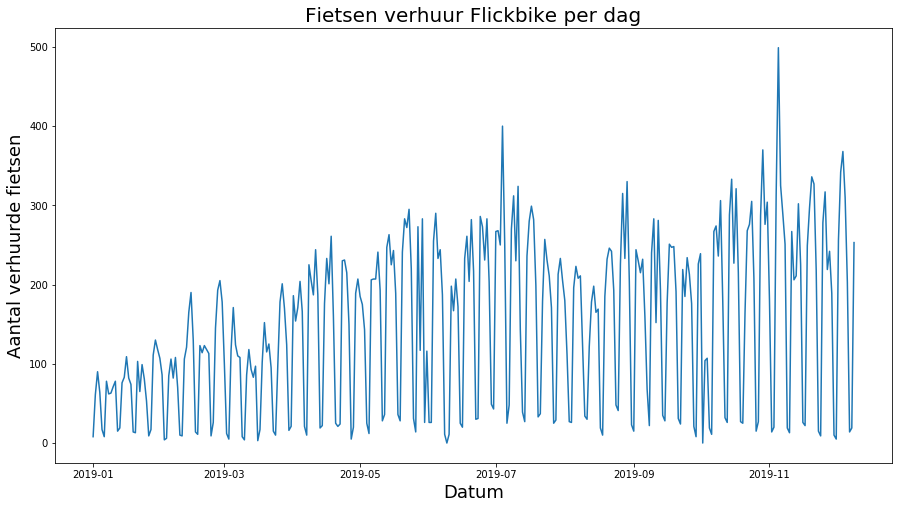

In [17]:
plt.figure(figsize=(15,8))
plt.plot(dates.index, dates)
plt.title("Fietsen verhuur Flickbike per dag", size=20)
plt.ylabel("Aantal verhuurde fietsen", size=18)
plt.xlabel("Datum", size=18)
plt.show()

### Analyse van de grafiek
In deze grafiek zie je per dag het aantal verhuurde fietsen. Wat mij aan deze grafiek opvalt is dat er in de weekenden bijna geen fietsen worden verhuurd. Hierdoor kan je heel gemakkelijk een week identificeren. Verder zie je dat er in het midden van de week meestal een klein dal zit. Ook komt het een aantal keer voor dat er een wat groter dal zit. Je ziet soms ook dat er op een doordeweekse dag significant minder fietsen worden verhuurd dan gebruikelijk is. Deze patronen zouden goed gebruikt kunnen worden voor de voorspelling van het aantal verhuurde fieten per dag.

Er zijn ook een aantal bijzonderheden in deze grafiek, Deze bijzonderheden zouden het gevolg kunnen zijn van een speciale dag of gebeurtenis. Bijvoorbeeld de piek de je ziet in begin november, deze piek kwam door dat er een piloot per ongeluk op de noodknop in de cockpit had gedrukt. Hierdoor is er massaal gebruik gemaakt van de fietsen. Tot slot zie ik dat die grafiek bestaat uit een soort heuvels die uit meerdere weken bestaan. Ik vind dit heel opmerkelijk en zou niet kunnen weten waarom die zo is.

De herhalende patronen en bijzonderheden die mij opvielen aan deze grafiek, zouden goed gebruikt kunnen worden om een voorspelling te maken van het aantal fietsen wat in de toekomst verhuurd gaat worden. Ik zal later een toelichting geven over welke methodes ik hiervoor wil gaan gebruiken

### Analyse per bedrijf
Ik heb ook een grafiek gemaakt van het aantal verhuurde fietsen per bedrijf. Hieruit blijkt dat er maar vier bedrijfen die veel gebruik maken van de dienst. Alle andere bedijfen maken vrij weinig gebruik van de dienst.

In [18]:
data["account"].unique()

array(['AT', 'AI', 'BJ', 'AV', 'AA', 'AY', 'AN', 'BK', 'AZ', 'AW', 'BM',
       'BE', 'BD', 'BQ', 'BC', 'AH', 'AU', 'AJ', 'AP', 'AQ', 'AD', 'AG',
       'BA', 'AL', 'AB', 'BL', 'AK', 'AM', 'AF', 'BP', 'BI', 'AX', 'BN',
       'BF', 'AR', 'BG', 'AS', 'BR', 'BB', 'AE', 'BO', 'AC', 'BH'],
      dtype=object)

In [19]:
accounts = pd.value_counts(data["account"])

In [20]:
accounts.head()

AT    33111
AV     6179
BJ     4179
AI     2794
BE      531
Name: account, dtype: int64

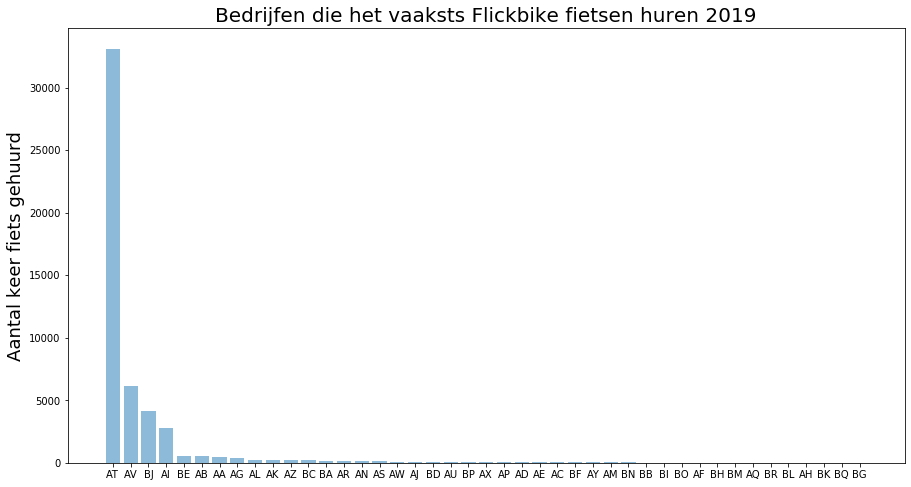

In [21]:
plt.figure(figsize=(15,8))
plt.bar(np.arange(len(accounts.index)), accounts, align='center', alpha=0.5)
plt.xticks(np.arange(len(accounts.index)), accounts.index)
plt.title("Bedrijfen die het vaaksts Flickbike fietsen huren 2019", size=20)
plt.ylabel("Aantal keer fiets gehuurd", size=18)
plt.show()

### Invloed van het weer
Om te kunnen bekijken of het weer invloed heeft op het aantal verhuurde fietsen heb ik gebruik gemaakt van weer data. Ik heb de temperatuur opgevraagd van heel 2019 en gekeken of er een mogelijke invloed is van het weer op het aantal verhuurde fietsen per dag. Eerst bekijk ik hieronder de temperatuur van 2019 en daarna maak ik een vergelijking met het aantal verhuurde fietsen.

In [22]:
weer_data = pd.read_table("data/KNMI_20191209.txt", delimiter=",", comment="#", names=["STN", "YYYYMMDD", "TG", "TN", "TX"], header=0)

In [23]:
weer_data

,STN,YYYYMMDD,TG,TN,TX
0,240,20190101,77,52,91
1,240,20190102,56,25,71
2,240,20190103,31,3,68
3,240,20190104,54,10,68
4,240,20190105,72,57,81
...,...,...,...,...,...
338,240,20191205,22,-23,58
339,240,20191206,73,55,100
340,240,20191207,95,75,104
341,240,20191208,93,73,114


In [24]:
weer_data["YYYYMMDD"] = dates.index
weer_data["TG"] = weer_data["TG"]/10
weer_data["TN"] = weer_data["TN"]/10
weer_data["TX"] = weer_data["TX"]/10

### Grafiek van de temperatuur van 2019

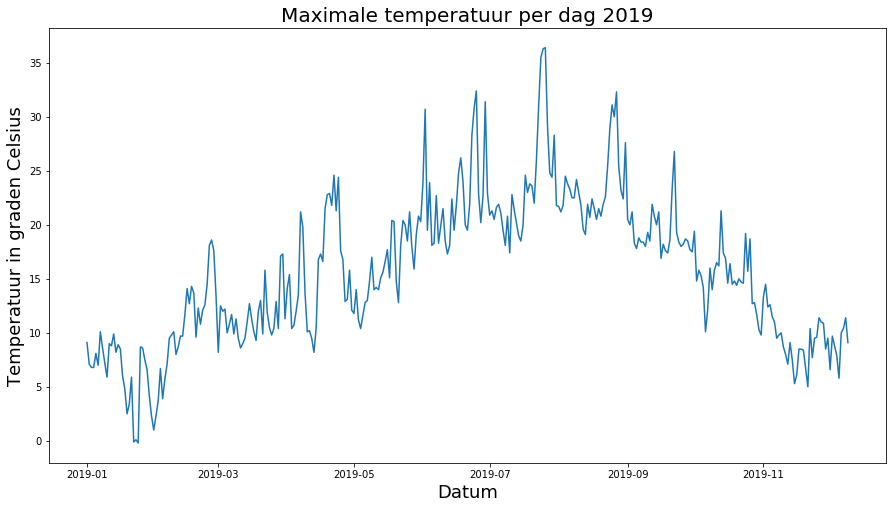

In [25]:
plt.figure(figsize=(15,8))
plt.plot(weer_data["YYYYMMDD"], weer_data["TX"])
plt.title("Maximale temperatuur per dag 2019", size=20)
plt.ylabel("Temperatuur in graden Celsius", size=18)
plt.xlabel("Datum", size=18)
plt.show()

### Normalizeren
Het aantal verhuurde fietsen per dag veel hoger licht dan de temperatuur. Daarom is het noodzakelijk om de data te normalizeren. Als je dit niet doet krijg je een slechte grafiek en kan je de mogelijk invloed van weer niet analyseren.

In [26]:
normalizer = preprocessing.Normalizer()

In [27]:
TX_norm = normalizer.transform([weer_data["TX"]])[0]

In [28]:
bikes_norm = normalizer.transform([dates])[0]

### Grafiek van de invloed van het weer

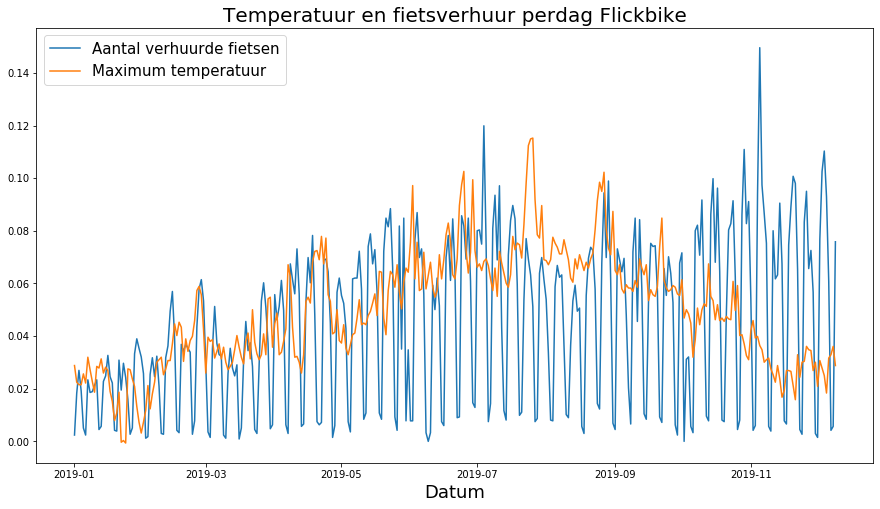

In [29]:
plt.figure(figsize=(15,8))
plt.plot(dates.index, bikes_norm)
plt.plot(weer_data["YYYYMMDD"], TX_norm)
plt.title("Temperatuur en fietsverhuur perdag Flickbike", size=20)
plt.xlabel("Datum", size=18)
plt.legend(["Aantal verhuurde fietsen", "Maximum temperatuur"], fontsize=15)
plt.show()

### Analyse invloed van het weer
hierboven het aantal verhuurde fietsen ten opzichen van maximum temperatuur per dag. In de Eerste grootste helf van de grafiek lijkt het alsof de fietsen verhuur positief correleert met de temperatuur. Maar als je het laatste gedeelte kijkt zie je dat het aantal verhuurde fietsen weer gaat stijgen, terwijl de temperatuur alleen maar verder zakt. Je zou hier dus kunnen stellen dat het weer wel degelijk invloed heeft op het aantal verhuurde fietsen. Maar die laatste stijging bijft toch vreemd.

### Welke voorspellende modellen
Voor het maken van voorspellingen op herhalende patronen zijn speciale voorspellende modellen beschikbaar. Het meest gebruikte model voor deze situatie is het LSTM(Long short-term memory) model. Een LSTM model voorspeld niet alleen op basis van zijn huidige input, maar ook op basis van eerdere voorspellingen die het model gemaakt heeft. Hierdoor kan het model herhalende patronen herkennen en daarom wil ik dit model gaan gebruiken voor deze opdracht. Een andere interessant model is het autoregressive model. Dit model kan ook voorspellingen maken op basis van herhalende patronen. En is ook een optie om naar te kijken.